![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


# What is a return?

The return formula


$$ R_{(t+1, t)} = \frac{  P_{t+1} - P_t }{  P_{t}   } $$

Or alternatively:

$$ R_{(t+1, t)} = \frac{  P_{t+1}  }{  P_t  }  - 1 $$

In [1]:
import numpy as np
import pandas as pd


In [2]:
prices_a = [8.70, 8.91, 8.71]
prices = np.array(prices_a)
print(prices)

[8.7  8.91 8.71]


In [3]:
print(prices[1:]/prices[:-1])
print(prices[1:]/prices[:-1] - 1)

[1.02413793 0.97755331]
[ 0.02413793 -0.02244669]


In [4]:
prices = pd.DataFrame(prices_a)
print(prices)

      0
0  8.70
1  8.91
2  8.71


In [5]:
prices = pd.DataFrame({'BLUE':[8.70, 8.91, 8.81, 8.43, 8.73] , 
                      'ORANGE':[10.66, 11.08, 10.71, 11.59, 12.11]    
                      })
print(prices)

   BLUE  ORANGE
0  8.70   10.66
1  8.91   11.08
2  8.81   10.71
3  8.43   11.59
4  8.73   12.11


In [6]:
print(prices.iloc[1:]/prices.iloc[:-1])

   BLUE  ORANGE
0   NaN     NaN
1   1.0     1.0
2   1.0     1.0
3   1.0     1.0
4   NaN     NaN


In [7]:
print(prices.iloc[1:].values/prices.iloc[:-1].values)

print()

print(prices.iloc[1:].values/prices.iloc[:-1].values -1)

#print(prices.iloc[1:].values/prices.iloc[:-1].values)


[[1.02413793 1.03939962]
 [0.98877666 0.9666065 ]
 [0.9568672  1.0821662 ]
 [1.03558719 1.04486626]]

[[ 0.02413793  0.03939962]
 [-0.01122334 -0.0333935 ]
 [-0.0431328   0.0821662 ]
 [ 0.03558719  0.04486626]]


In [8]:
prices/prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,1.024138,1.039400
2,0.988777,0.966606
3,0.956867,1.082166
4,1.035587,1.044866


In [9]:
prices/prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.011223,-0.033394
3,-0.043133,0.082166
4,0.035587,0.044866


In [10]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.011223,-0.033394
3,-0.043133,0.082166
4,0.035587,0.044866


In [11]:
# To summarize.

# Can get percentage change in three ways:

print(prices.iloc[1:].values/prices.iloc[:-1].values)
print(prices/prices.shift()) # default value of shift() is 1
print(prices.pct_change())


[[1.02413793 1.03939962]
 [0.98877666 0.9666065 ]
 [0.9568672  1.0821662 ]
 [1.03558719 1.04486626]]
       BLUE    ORANGE
0       NaN       NaN
1  1.024138  1.039400
2  0.988777  0.966606
3  0.956867  1.082166
4  1.035587  1.044866
       BLUE    ORANGE
0       NaN       NaN
1  0.024138  0.039400
2 -0.011223 -0.033394
3 -0.043133  0.082166
4  0.035587  0.044866


In [12]:
prices = pd.read_csv('data/sample_prices.csv')
print(prices)

      BLUE   ORANGE
0   8.7000  10.6600
1   8.9055  11.0828
2   8.7113  10.7100
3   8.4346  11.5907
4   8.7254  12.1070
5   9.0551  11.7876
6   8.9514  11.2078
7   9.2439  12.5192
8   9.1276  13.3624
9   9.3976  14.4080
10  9.4554  11.9837
11  9.5704  12.2718
12  9.7728  11.5892


In [13]:
returns = prices.pct_change()
print(returns)





        BLUE    ORANGE
0        NaN       NaN
1   0.023621  0.039662
2  -0.021807 -0.033638
3  -0.031763  0.082232
4   0.034477  0.044544
5   0.037786 -0.026381
6  -0.011452 -0.049187
7   0.032676  0.117008
8  -0.012581  0.067353
9   0.029581  0.078249
10  0.006151 -0.168261
11  0.012162  0.024041
12  0.021149 -0.055623


Plot raw stock prices

<AxesSubplot:>

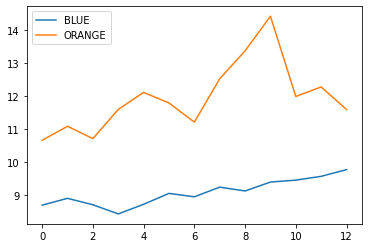

In [14]:
prices.plot()

Plot percent change of stock prices

<AxesSubplot:>

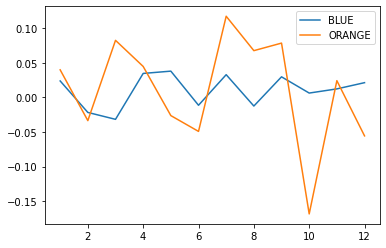

In [15]:
returns.plot()

Plot the returns as bar graph

<AxesSubplot:>

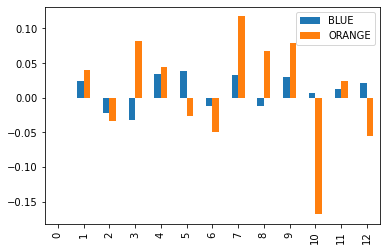

In [16]:
returns.plot(kind = 'bar')

Find the std and mean returns 

In [17]:
print(returns.mean())
print(returns.std())


BLUE      0.01
ORANGE    0.01
dtype: float64
BLUE      0.023977
ORANGE    0.079601
dtype: float64


How to compound the returns

In [18]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


The below gives the compounded returns

In [19]:

print(np.prod(returns+1) - 1)

BLUE      0.123310
ORANGE    0.087167
dtype: float64


In [20]:
print((returns + 1).prod() - 1)
print()
print( (((returns + 1).prod() - 1) * 100).round(2) )


BLUE      0.123310
ORANGE    0.087167
dtype: float64

BLUE      12.33
ORANGE     8.72
dtype: float64


In [21]:
prices.std()

BLUE      0.393871
ORANGE    1.051976
dtype: float64

In [22]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

# Annualizing Volatility

Daily volatility is different than monthly or anuanl. 

Hence, to anualize daily volatility we use the following formula:

$$ \sigma_{ann} = \sigma_p\sqrt{p} $$

Where p is the number of days in the year. For us this is 252. 

Example:

If the volatility of a stock's daily return series is .1% then we get the following annual volatility.

$$ \sigma_{ann} = 0.001  \sqrt{252} = 1.58% $$



# Risk Adjusted Measures

Basic measure is Return/Risk.

## Sharpe Ratio

A better one is the Sharpe Ratio:

$$ Sharpe Ratio(P) = \frac{R_p - R_f}{\sigma_p} $$

Where $R_p$ is the return with the risk, $R_f$ is the risk free return rate and $\sigma_p$ is the volatility. 

Example: 

Let $R_f = 3%$.

Then we have the Sharpe Ratio to be:

Small Cap $$ (17.2\% - 3\%) / 36.8\% = 0.39 $$

Large Cap $$  (9.5\% - 3\%) / 18.7\% = 0.35 $$

Sharpe Ratio tells us that the excess return over the risk free rate makes the SMALL CAP stocks provide better returns than LARGE CAP stocks over the given period. 


## MAX Drawdown




In [23]:
returns = returns.dropna()
print(returns)

        BLUE    ORANGE
1   0.023621  0.039662
2  -0.021807 -0.033638
3  -0.031763  0.082232
4   0.034477  0.044544
5   0.037786 -0.026381
6  -0.011452 -0.049187
7   0.032676  0.117008
8  -0.012581  0.067353
9   0.029581  0.078249
10  0.006151 -0.168261
11  0.012162  0.024041
12  0.021149 -0.055623


In [24]:

data = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', 
                  header = 0, index_col = 0, parse_dates = True,
                  na_values = -99.99
                  )

data.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [25]:
keep_features = ['Lo 10', 'Hi 10']
returns = data[keep_features]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [26]:
returns = returns/100

returns.columns = ['SmallCap', 'LargeCap']
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

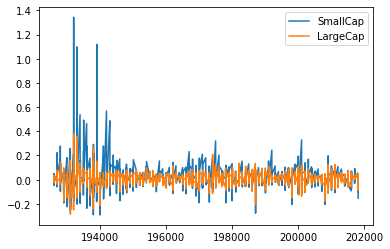

In [27]:
returns.plot()

<AxesSubplot:>

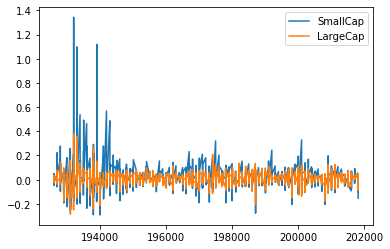

In [28]:
returns.plot(kind = 'line')

# MAX DRAWDOWN

It is the maximum loss from the previous high to a subsequent low. Buy at its highest value - sell at the bottom. It is the worst possible return you could have been if you bought high nd sold low. 

## Construct a wealth index

To compute drawdowns is to construct a wealth index. Wealth index is the hypothetical buy-and-hold investment in the asset of \$1000 or \$10,000. 

## Calmar Ratio

The drawndown risk can be used as the denominator in return/risk measure. 

Hence, the calmar ratio is defined as the ratio of the annualized return over the trailing 36 months ot the maximum drawdown over those trailing 36 months. 

## Issues with Drawdown risk:

Drawdown on a daily basis is very different from weekly or monthly basis. Hence, the risk is highly dependant on the time increment that is used - the granurality. For example, the daily drawdown is always greater than or equal to the weekly or monthlydrawdown.

Also, the drawdown is very sensitive to outliers because is the dependant on only two values: the traugh and the crescent.

VAR and CVAR are better measures.

# Lab 2: Risk Adjusted Returns

In [29]:
rets = returns
rets.index = pd.to_datetime(rets.index, format = '%Y%m')
rets.index = rets.index.to_period('M')


In [30]:
print(rets.head())

         SmallCap  LargeCap
1926-07   -0.0145    0.0329
1926-08    0.0512    0.0370
1926-09    0.0093    0.0067
1926-10   -0.0484   -0.0243
1926-11   -0.0078    0.0270


In [31]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute Drawdowns

1. Compute a wealth index
2. Compute previous peaks
3. Cpmute drawdown - which i sthe wealth value as a precentage of the previous peak.

Wealth index is nothing but the compound interest over 1 year if invested $1000.

<AxesSubplot:>

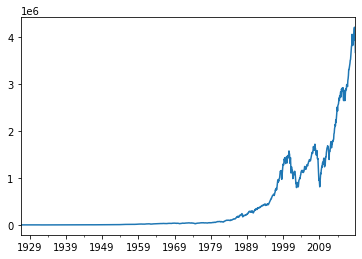

In [32]:
wealth_index = 1000*(1+rets['LargeCap']).cumprod()
wealth_index.plot()

# Lab 3: Drawdown Lab

## Compute drawdowns

1. Compute wealth-index
2. Compute previous peaks
3. Compute drawdowns - which is the wealth value divided by the previous peaks. 

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64


<AxesSubplot:>

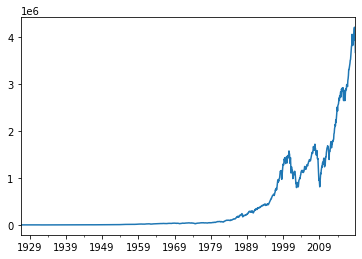

In [33]:
wealth_index = 1000 * (    (1+rets['LargeCap']).cumprod()   )  # Inside the braket is the cumulative returns over time so is also a time series. 
print(wealth_index.head())
wealth_index.plot()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Lab 3: Drawdown

In [34]:
'15'[0]

'1'